In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
dados = pd.read_excel('Banco SIVEP 22_09_2022 07_32_38.xlsx')

In [3]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [4]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza',2:'Influenza'})

In [5]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [19]:
filtro = dados[['Competencia Evolucao','Houve internacao','Classificacao final','Evolucao','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]

In [18]:
numerador = filtro.loc[filtro['Evolucao']=='Óbito']
numerador = numerador.loc[numerador['Houve internacao']=='Sim']
numerador = numerador.groupby('Competencia Evolucao').count()
numerador['Calculo'] = numerador['pos_pcrflu'] + numerador['pcr_vsr']
numerador.head()

,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr,Calculo
Competencia Evolucao,,,,,,,,
2020_01,17,17,17,1,1,0,0,1
2020_02,17,17,17,0,0,0,0,0
2020_03,97,97,97,4,1,1,0,4
2020_04,363,363,363,20,0,0,0,20
2020_05,656,656,656,56,0,0,1,57


In [20]:
denominador = filtro
denominador['Evolucao'] = denominador['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'}) #Vai substituir onde esta Óbito ou Cura por Óbito/Cura, para dps podermos pegar so as linhas que interessam
denominador = denominador.loc[denominador['Evolucao']=='Óbito/Cura']
denominador = denominador.loc[denominador['Houve internacao']=='Sim']
denominador = denominador.groupby('Competencia Evolucao').count()
denominador['Calculo'] = denominador['pos_pcrflu'] + denominador['pcr_vsr']
denominador.head()

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_47256\3704925247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denominador['Evolucao'] = denominador['Evolucao'].map({'Óbito':'Óbito/Cura','Cura':'Óbito/Cura'}) #Vai substituir onde esta Óbito ou Cura por Óbito/Cura, para dps podermos pegar so as linhas que interessam


,Houve internacao,Classificacao final,Evolucao,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr,Calculo
Competencia Evolucao,,,,,,,,
2020_01,57,57,57,4,4,1,0,4
2020_02,82,82,82,5,4,3,0,5
2020_03,557,557,557,29,3,3,0,29
2020_04,2187,2187,2187,150,1,0,2,152
2020_05,3202,3202,3202,317,1,0,1,318


In [22]:
calculo = numerador['Calculo']/denominador['Calculo']*100
calculo = calculo.to_frame()
calculo = calculo.reset_index()
calculo.head()

,Competencia Evolucao,Calculo
0,2020_01,25.000000
1,2020_02,0.000000
2,2020_03,13.793103
3,2020_04,13.157895
4,2020_05,17.924528


In [24]:
semana = calculo['Competencia Evolucao']

In [26]:
eixo_y = calculo['Calculo']

[Text(0, 0, '0%'),
 Text(0, 10, '10%'),
 Text(0, 20, '20%'),
 Text(0, 30, '30%'),
 Text(0, 40, '40%'),
 Text(0, 50, '50%'),
 Text(0, 60, '60%'),
 Text(0, 70, '70%')]

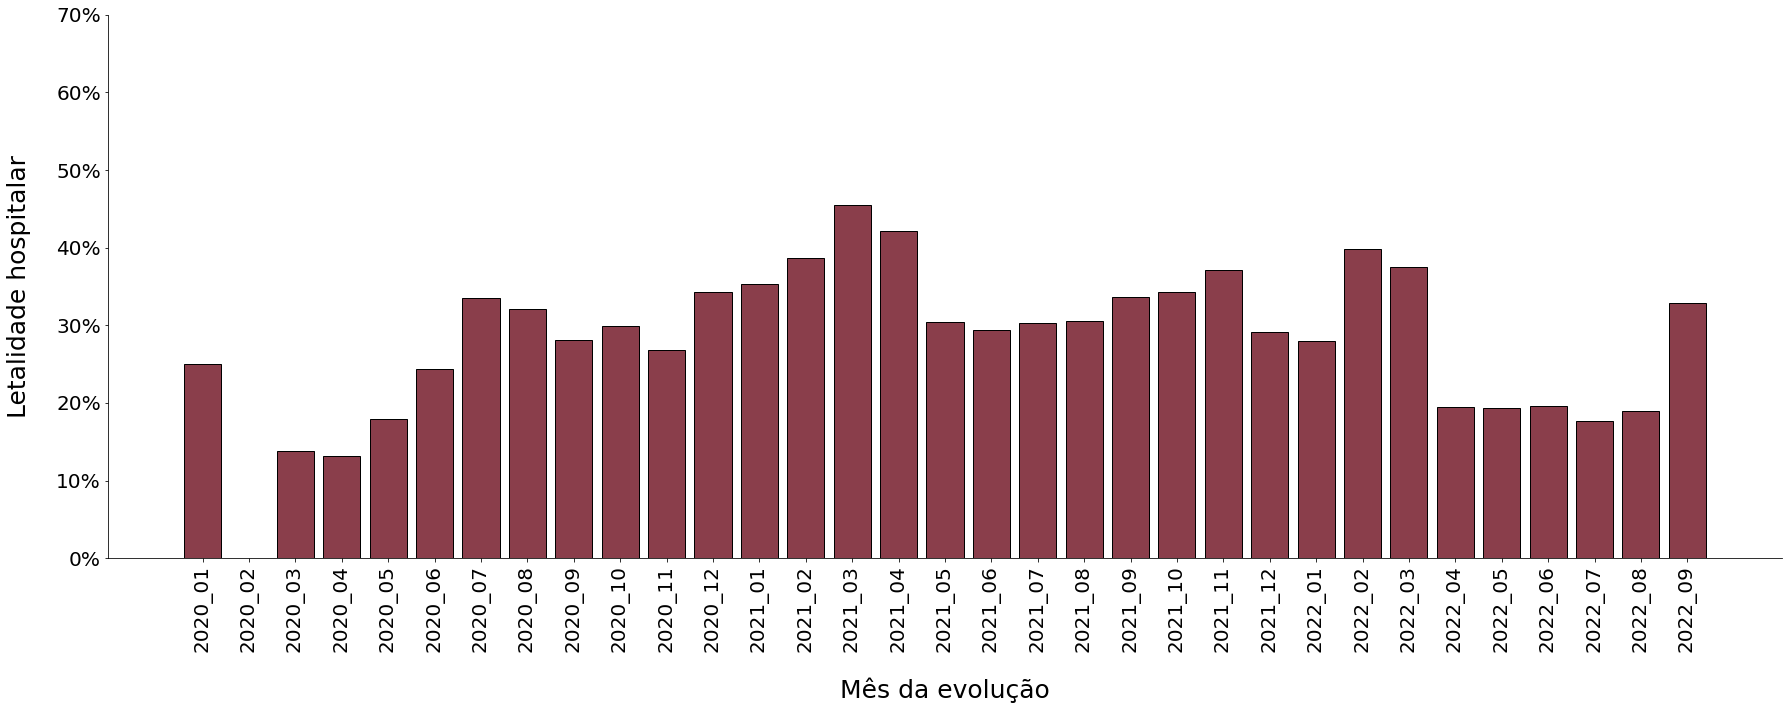

In [27]:
plt.figure(figsize=(30,10))
plt.bar(semana,eixo_y,color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=20)
plt.yticks(np.arange(0,80,10),fontsize=20)
plt.xlabel('Mês da evolução',fontsize=25,labelpad=25)
plt.ylabel('Letalidade hospitalar',fontsize=25,labelpad=25)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
#plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/Slide8.png',dpi=720,bbox_inches='tight')